Object tracking + color detection
---
by Vera Gnezdilova, Vadim Khanin, Sofya Rozhok

The purpose of the project was to track the movement of vehicles in a traffic surveillance and detect colors of cars.

In [5]:
import cv2
import numpy as np
import requests
import shutil
import webcolors
from IPython.display import Video
from IPython.display import Image

In [1]:
#Functions to identify colors and color names 

def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        # Attempts direct color matching using webcolors.rgb_to_name
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        # If direct matching fails, finds the closest matching color using closest_colour
        closest_name = closest_colour(requested_colour)
        actual_name = None
    # Returns both the actual and closest color names
    return actual_name, closest_name



In [3]:
#Example of an input video:
Video("test_vid2.mp4")

In [2]:
#Car detection:


# Load the pre-trained Haar Cascade classifier for car detection
# More about Haar feature-based cascade classifier at: https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html
car_cascade = cv2.CascadeClassifier('cars.xml')

# Read the input video
cap = cv2.VideoCapture('test_vid2.mp4')

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error opening video file")

# Set up video writer to save the processed video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output_video_with_cars.avi', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))
                    

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect cars in the frame
    cars = car_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw rectangles and color around the detected cars 
    for (x, y, w, h) in cars:
        roi = frame[y:y+h, x:x+w]
        pixel_values = roi.reshape((-1, 3))
        pixel_values = np.float32(pixel_values)
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
        _, labels, (centers) = cv2.kmeans(pixel_values, 3, None, criteria, 10, cv2.KMEANS_PP_CENTERS)
        centers = np.uint8(centers)
        dominant_color = centers[np.argmax(np.unique(labels, return_counts=True)[1])]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)   
        color = dominant_color
        actual_name, closest_name = get_colour_name(color)
        cv2.putText(frame,closest_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    # Write the frame with car rectangles to the output video
    out.write(frame)

# Release video capture object and video writer
cap.release()
out.release()

In [4]:
#Output:
Video("output_video_with_cars.avi")

Example of a video frame:

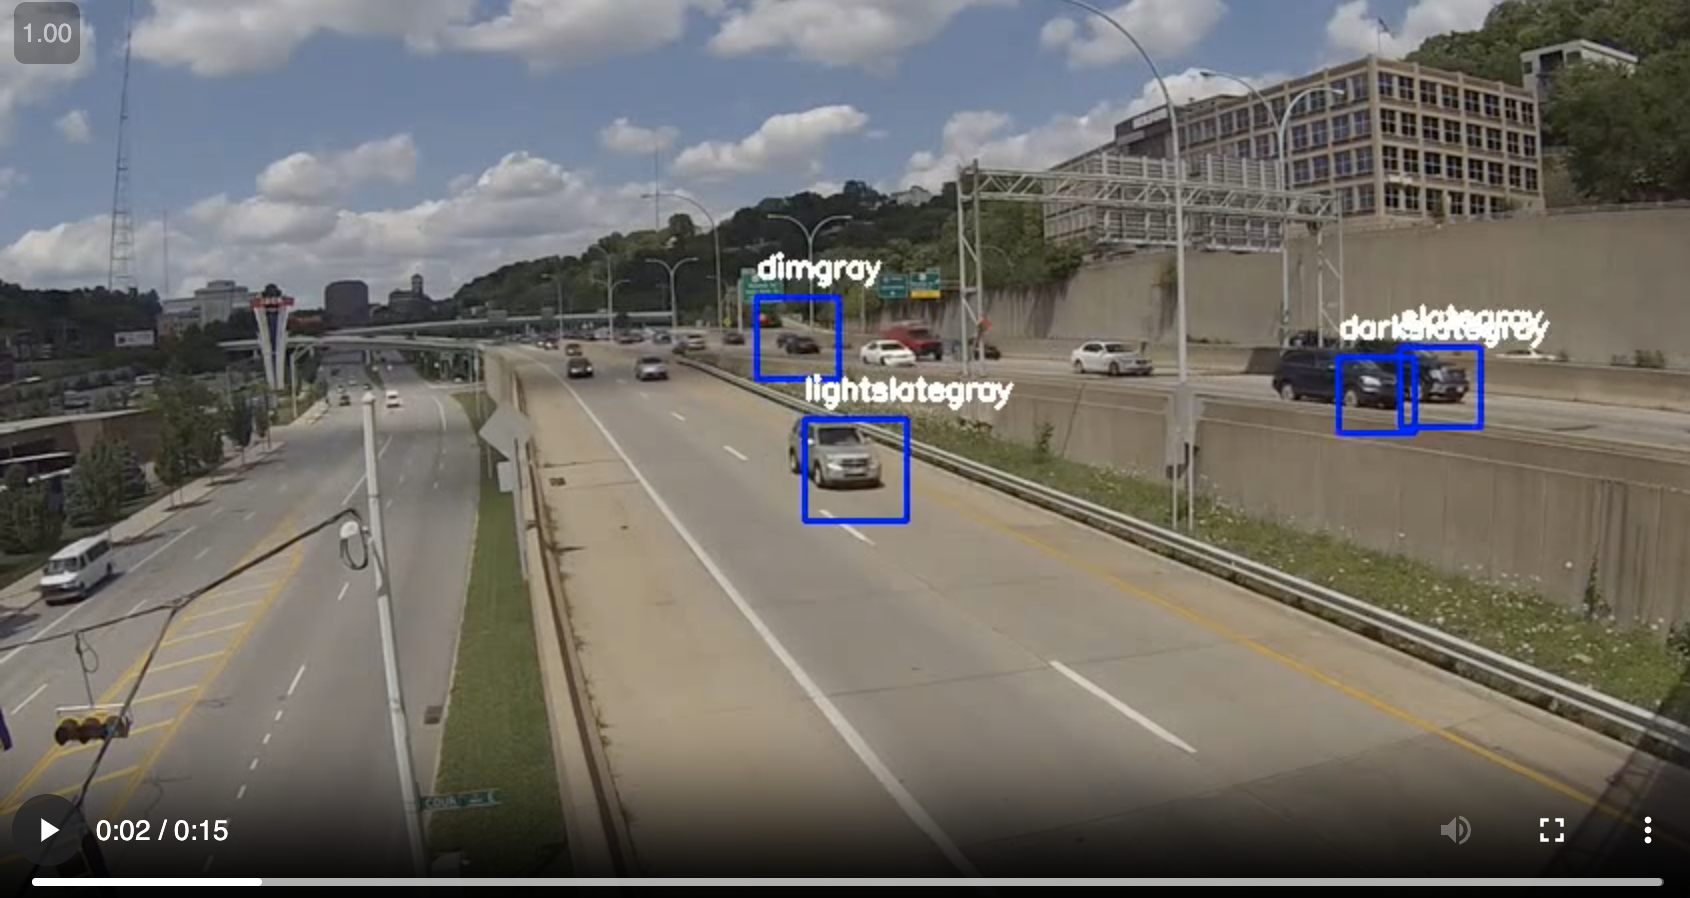

In [6]:
Image("example.jpg")